## Final Project Submission

Please fill out:
* Student name: Andi Osika
* Student pace: part time
* Scheduled project review date/time: na
* Instructor name: James Irving, PhD
* Blog post URL: TBD


## Background:

This dataset was created by a project created by a UK based platform-solutions company called Nexoid.  https://www.nexoid.com/

At the start of the pandemic, nexoid noted that there was a lack of large datasets required to predict the spread and mortality of COVID-19. Worryingly without these datasets, governments are left blind, potentially making policies that put lives at risk. They took it upon themselves to create and share this dataset. It is a not-for-profit project with the goal of providing researchers and governments the data needed to help understand and fight COVID-19.

https://www.covid19survivalcalculator.com/


In [1]:
##Importing dataset
import pandas as pd
df = pd.read_csv("master_dataset4.csv")
pd.set_option('display.max_columns', 0)
df.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,4/4/2020,NaN,US,35.9568,-86.5301,200.0,female,40_50,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NaN,55.0,35.0,64.248,0.721
1,4/5/2020,NaN,US,39.6512,-82.6200,20.0,female,20_30,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,15.0,15.0,57.549,0.016
2,4/5/2020,NaN,US,27.7723,-82.2767,10.0,female,0_10,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,62.377,0.000
3,4/5/2020,NaN,US,39.6675,-77.5666,10.0,female,30_40,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195
4,4/4/2020,NaN,US,41.3527,-81.7444,50.0,male,50_60,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463


## Inspecting the dataset:

This set of data contains just over 619K entries and has 43 columns of both numeric and categorical data.  Because of the size of this dataset, pandas profiling will be used to inform potential challenges that could limit best projections.

In [5]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport

AttributeError: module 'pandas_profiling' has no attribute 'templates'

In [4]:

profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="output.html")

NameError: name 'ProfileReport' is not defined

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619027 entries, 0 to 619026
Data columns (total 43 columns):
survey_date                  619027 non-null object
region                       42296 non-null object
country                      619010 non-null object
ip_latitude                  619027 non-null float64
ip_longitude                 619027 non-null float64
ip_accuracy                  619026 non-null float64
sex                          619027 non-null object
age                          619027 non-null object
height                       619027 non-null int64
weight                       619027 non-null int64
bmi                          619027 non-null float64
blood_type                   619027 non-null object
smoking                      617174 non-null object
alcohol                      617174 non-null float64
cannabis                     606540 non-null float64
amphetamines                 591599 non-null float64
cocaine                      589898 non-null float64


Initial visual inspection of null values indicates that region and prescription medication are sparsely populated.  The opinion_infections and opinion_mortality columns are also a little 'light' in terms of responses. Other than that, there doesn't seem to be be any clear, apparent patterns for incomplete data. (See below)

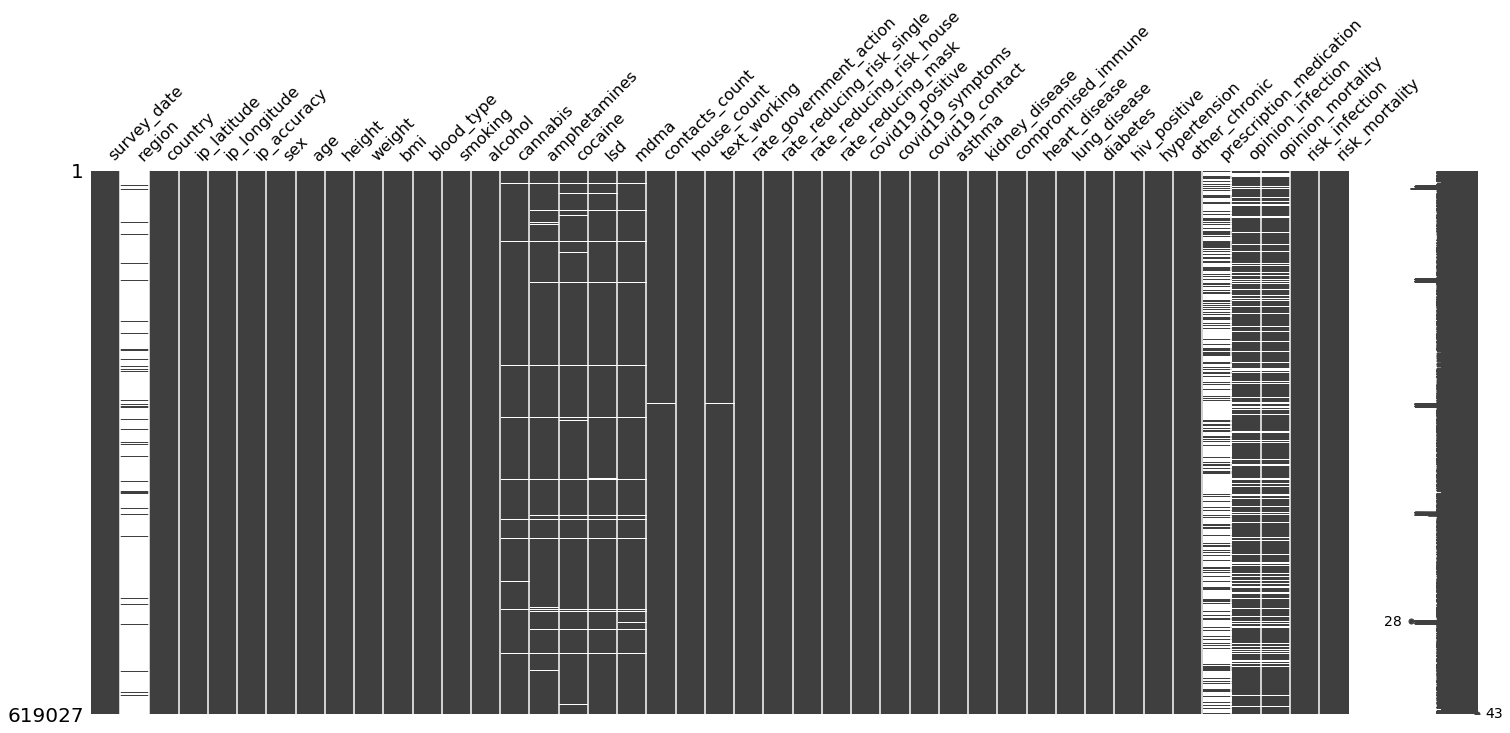

In [3]:
import missingno
missingno.matrix(df)

Aditional inspection shows that there are quite a few columns with less than 5% null values.  Since this dataset is so large, it seems reasonable to remove these.  Details follow:

In [4]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls


,variable,%_Null
1,region,93.167342
38,prescription_medication,68.800876
40,opinion_mortality,17.445604
39,opinion_infection,17.445604
16,cocaine,4.705611
15,amphetamines,4.430825
17,lsd,4.089644
18,mdma,3.513255
14,cannabis,2.017198
21,text_working,0.683654


In [6]:
cols_to_drop_na = ['country','ip_accuracy','smoking', 'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 
                   'contacts_count', 'text_working', 'rate_reducing_mask', 'risk_infection',
                  'risk_mortality']

In [7]:
df.dropna(subset=cols_to_drop_na, inplace=True)

In [8]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls

,variable,%_Null
1,region,93.322091
38,prescription_medication,68.619982
40,opinion_mortality,16.900436
39,opinion_infection,16.900436
30,kidney_disease,0.000000
23,rate_reducing_risk_single,0.000000
24,rate_reducing_risk_house,0.000000
25,rate_reducing_mask,0.000000
26,covid19_positive,0.000000
27,covid19_symptoms,0.000000


In [13]:
df['region'].isnull().sum()/len(df)

0.9332209106239461

In [14]:
df['region'].value_counts()

EU    22523
OC     6965
SA     4103
AS     4073
AF      748
Name: region, dtype: int64

#### Dropping Region as a feature due to lack of complete data, and will rely on lat/long and/or country for geographic information

In [15]:
df.drop('region', axis=1, inplace=True)

### Dealing with how to impute 'opinions'

In [21]:
df['opinion_mortality'].value_counts(normalize=True)

5.0     0.460670
15.0    0.178922
25.0    0.106206
45.0    0.065505
55.0    0.059436
35.0    0.057783
65.0    0.023647
75.0    0.023350
85.0    0.014222
95.0    0.010262
Name: opinion_mortality, dtype: float64

In [22]:
df['opinion_infection'].value_counts(normalize=True)

25.0    0.167097
45.0    0.148846
55.0    0.145599
15.0    0.139670
5.0     0.132700
35.0    0.129018
65.0    0.058482
75.0    0.046609
85.0    0.018159
95.0    0.013820
Name: opinion_infection, dtype: float64

### Prescription Medication 

In [27]:
df['prescription_medication'].value_counts(normalize=True)

LEVOTHYROXINE SODIUM                                                                                                                                       0.052520
SERTRALINE HYDROCHLORIDE                                                                                                                                   0.033124
ESCITALOPRAM OXALATE                                                                                                                                       0.021318
LISINOPRIL                                                                                                                                                 0.020925
AMPHETAMINE ASPARTATE;AMPHETAMINE SULFATE;DEXTROAMPHETAMINE SACCHARATE;DEXTROAMPHETAMINE SULFATE                                                           0.016105
                                                                                                                                                             ...   
CLONAZEPAM;ESCIT